In [180]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer

In [181]:
# Import data
df = pd.read_csv('Git/income_prediction/data/adult.csv')

In [182]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [184]:
# les NaN sont sous format '?'
df = pd.read_csv('Git/income_prediction/data/adult.csv', na_values='?')

In [185]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [187]:
# Age : numeric
# Workclass : category
# fnlwgt : numeric
# education : category
# education.num : category
# marital.status : category
# occupation : category
# relationship : category
# race : category
# sex : category
# capital.gain : numeric
# capital.loss : numeric
# hours.per.week : numeric
# native.country : category
# income : category

## education.num doit être modifié en category

In [188]:
df.groupby('education.num').education.nunique()

education.num
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
Name: education, dtype: int64

In [189]:
df.groupby('education')['education.num'].mean().sort_values()
# Conclusion : on garde la caractère numérique de education.num car ça traduit une relation d'ordre dans le niveau d'études
# On peut ainsi supprimer la colonne education qui n'est que répétition de education.num

education
Preschool        1
1st-4th          2
5th-6th          3
7th-8th          4
9th              5
10th             6
11th             7
12th             8
HS-grad          9
Some-college    10
Assoc-voc       11
Assoc-acdm      12
Bachelors       13
Masters         14
Prof-school     15
Doctorate       16
Name: education.num, dtype: int64

In [190]:
df = df.drop('education', axis=1)

21648


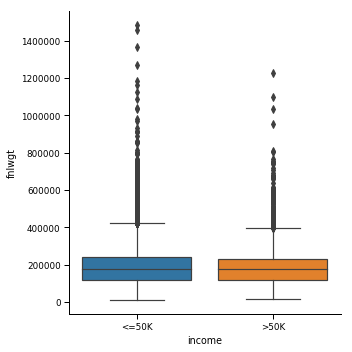

In [211]:
sns.catplot(x="income", y="fnlwgt", kind="box", data=df)
print(df.fnlwgt.nunique())
# Variable non pertinente pour notre problème : même distribution et beaucoup de valeurs distinctes

In [212]:
df = df.drop('fnlwgt', axis=1)

In [213]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Adm-clerical,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Missing data

In [192]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null
# Conclusion : 3 colonnes avec des données manquantes

,Total,Percent
occupation,1843,0.056601
workclass,1836,0.056386
native.country,583,0.017905
income,0,0.000000
hours.per.week,0,0.000000
capital.loss,0,0.000000
capital.gain,0,0.000000
sex,0,0.000000
race,0,0.000000
relationship,0,0.000000


### Workclass

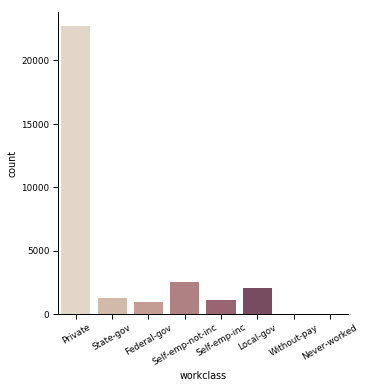

In [193]:
g = sns.catplot(x="workclass", kind="count",palette="ch:.25", data=df) 
g.set_xticklabels(rotation=30)
g
# La classe 'Private' domine très clairement les autres
# On peut donc supposer que les données manquantes sont en réalité des 'Private'

In [194]:
# Imputation valeur workclass
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['workclass'] = imp_mf.fit_transform(df[['workclass']])

In [195]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null

,Total,Percent
occupation,1843,0.056601
native.country,583,0.017905
income,0,0.000000
hours.per.week,0,0.000000
capital.loss,0,0.000000
capital.gain,0,0.000000
sex,0,0.000000
race,0,0.000000
relationship,0,0.000000
marital.status,0,0.000000


### Native Country

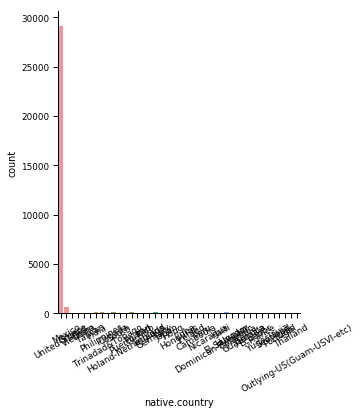

In [196]:
g = sns.catplot(x="native.country", kind="count", data=df)
g.set_xticklabels(rotation=30)
g
# Graphe peu lisible mais on voit clairement que la grosse majorité des personnes ont les USA pour pays d'origine.

In [197]:
df.groupby('native.country').income.count().sort_values(ascending=False)
# Confirmé par ces stats

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [198]:
# Imputation valeur native.country
df['native.country'] = imp_mf.fit_transform(df[['native.country']])

In [199]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null

,Total,Percent
occupation,1843,0.056601
income,0,0.000000
native.country,0,0.000000
hours.per.week,0,0.000000
capital.loss,0,0.000000
capital.gain,0,0.000000
sex,0,0.000000
race,0,0.000000
relationship,0,0.000000
marital.status,0,0.000000


### Occupation

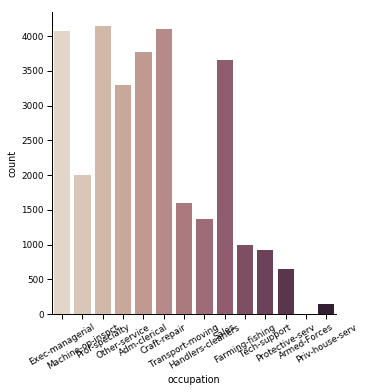

In [200]:
g = sns.catplot(x="occupation", kind="count", palette="ch:.25", data=df)
g.set_xticklabels(rotation=30)
g
# Pas d'occupation qui ressort particulièrement
# Comment choisir quelle occupation imputer ?

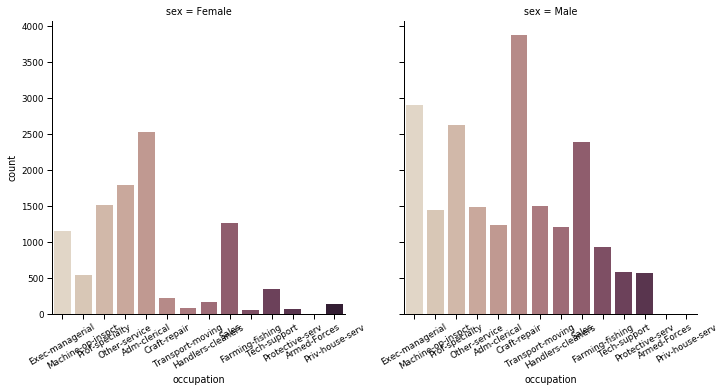

In [201]:
g = sns.catplot(x="occupation", kind="count", palette="ch:.25", data=df, col='sex')
g.set_xticklabels(rotation=30)
g
# On voit que c'est un peu plus différencié en fonction du sexe. 
# On prend le most_frequent dans les 2 catégories

In [202]:
df[df['sex']=='Male'] = df[df['sex']=='Male'].fillna('Craft-repair')
df[df['sex']=='Female'] = df[df['sex']=='Female'].fillna('Adm-clerical')

In [203]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null

,Total,Percent
income,0,0.0
native.country,0,0.0
hours.per.week,0,0.0
capital.loss,0,0.0
capital.gain,0,0.0
sex,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital.status,0,0.0


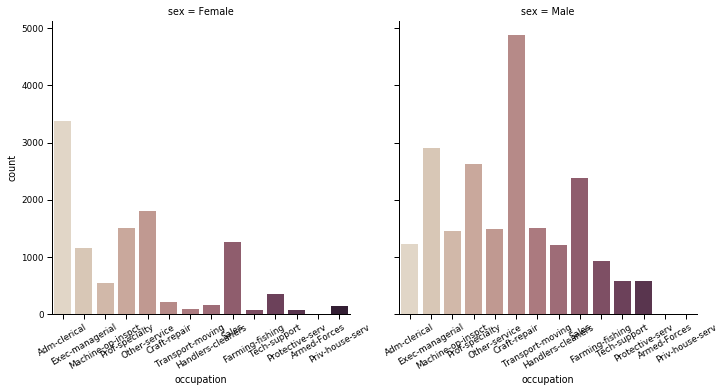

In [204]:
g = sns.catplot(x="occupation", kind="count", palette="ch:.25", data=df, col='sex')
g.set_xticklabels(rotation=30)
g
# Pas tout à fait satisfaisant mais mieux que sans distinction

# Corrélation

In [172]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,10,Widowed,Adm-clerical,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [169]:
from scipy.stats import spearmanr
spearmanr(df['education.num'], df['hours.per.week'])

SpearmanrResult(correlation=0.16721512251332687, pvalue=8.30313002330416e-203)

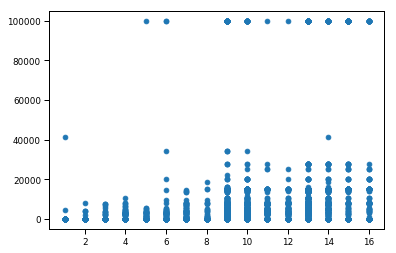

In [163]:
plt.scatter(df['education.num'],df['capital.gain'])

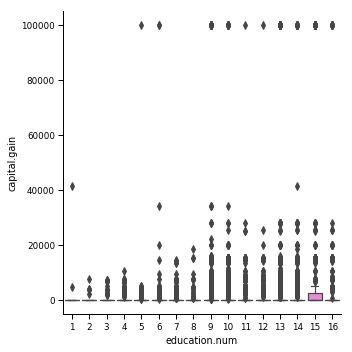

In [171]:
sns.catplot(x="education.num", y="capital.gain", kind="box", data=df)

In [176]:
df['native.country'] = ['United-States' if x == 'United-States' else 'Other' for x in df['native.country']]
df['workclass'] = ['Private' if x == 'Private' else 'Other' for x in df['workclass']]
df['race'] = ['White' if x == 'Private' else 'Other' for x in df['race']]

# Dummies

In [177]:
df['native.country'] = [0 if x == 'Other' else 1 for x in df['native.country']]
df['workclass'] = [0 if x == 'Other' else 1 for x in df['workclass']]
df['sex'] = [0 if x == 'Female' else 1 for x in df['sex']]
df['race'] = [0 if x == 'Other' else 1 for x in df['sex']]
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]

In [178]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,9,Widowed,Adm-clerical,Not-in-family,1,1,0,4356,40,0,1
1,82,0,132870,9,Widowed,Exec-managerial,Not-in-family,1,1,0,4356,18,0,1
2,66,0,186061,10,Widowed,Adm-clerical,Unmarried,1,1,0,4356,40,0,1
3,54,0,140359,4,Divorced,Machine-op-inspct,Unmarried,1,1,0,3900,40,0,1
4,41,0,264663,10,Separated,Prof-specialty,Own-child,1,1,0,3900,40,0,1


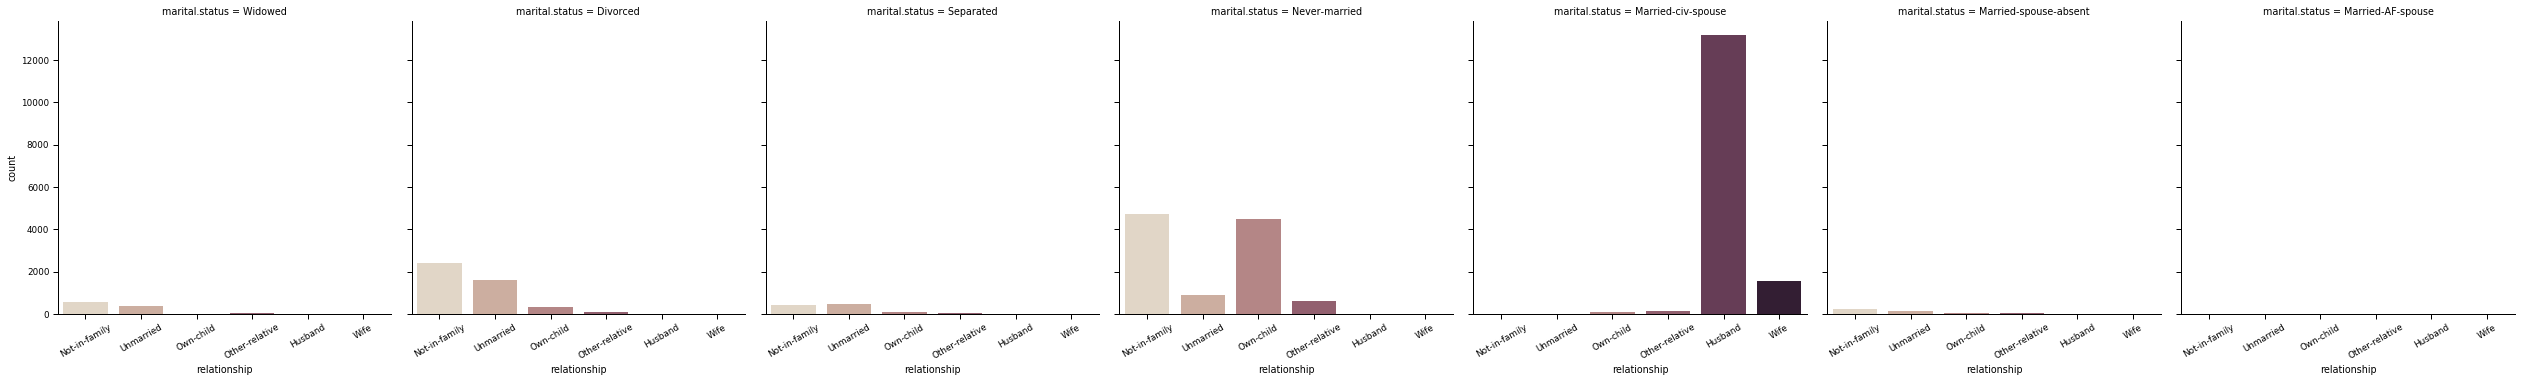

In [217]:
g = sns.catplot(x="relationship", kind="count", palette="ch:.25", data=df, col='marital.status')
g.set_xticklabels(rotation=30)
g

In [218]:
df.groupby('marital.status').age.count()

marital.status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
Name: age, dtype: int64

In [219]:
df.groupby('relationship').age.count()

relationship
Husband           13193
Not-in-family      8305
Other-relative      981
Own-child          5068
Unmarried          3446
Wife               1568
Name: age, dtype: int64

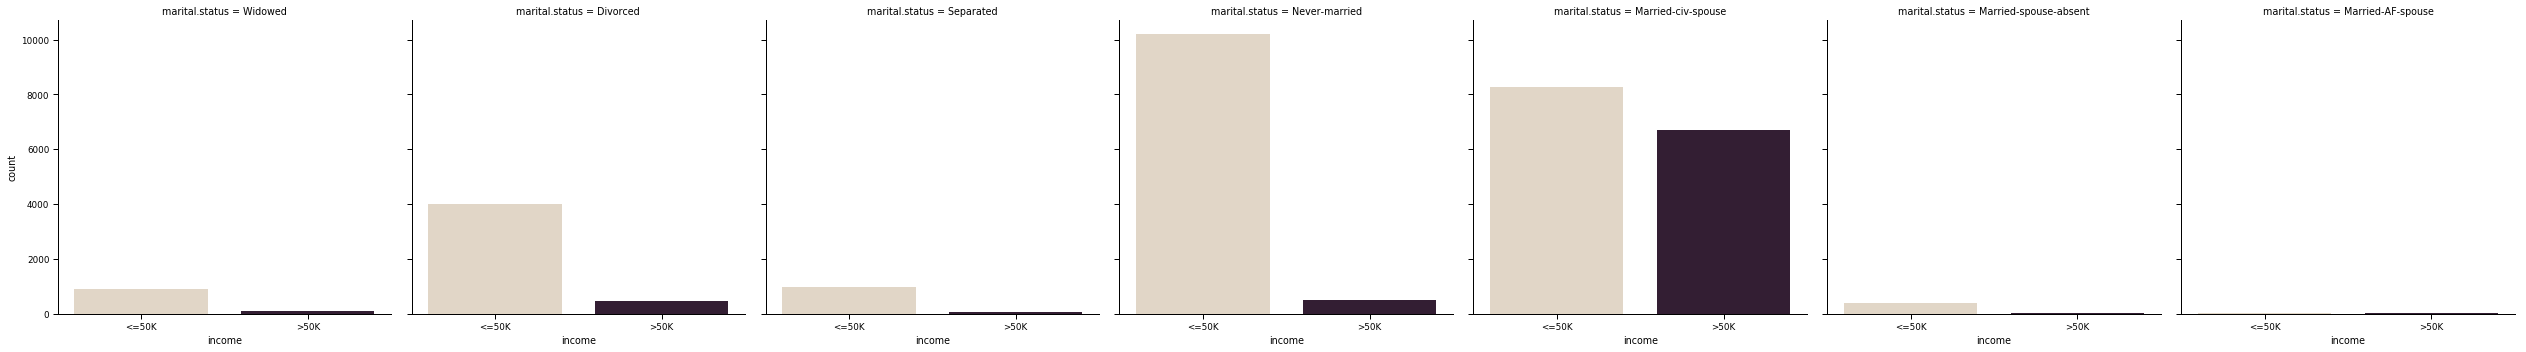

In [221]:
g = sns.catplot(x="income", kind="count", palette="ch:.25", data=df, col='marital.status')

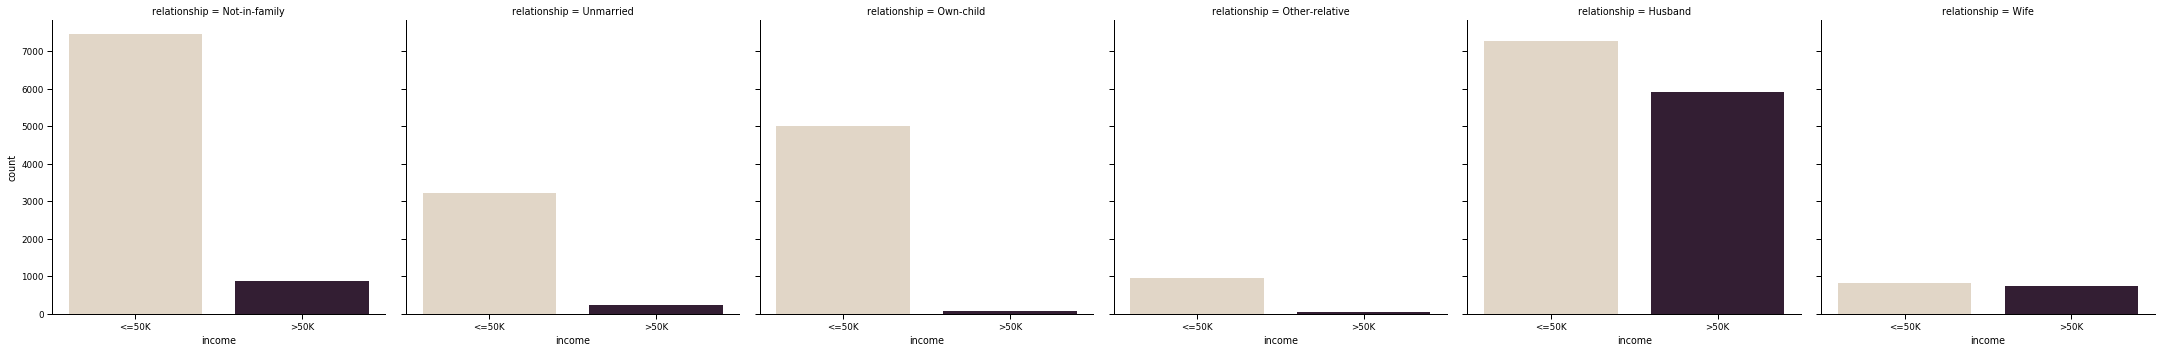

In [222]:
g = sns.catplot(x="income", kind="count", palette="ch:.25", data=df, col='relationship')

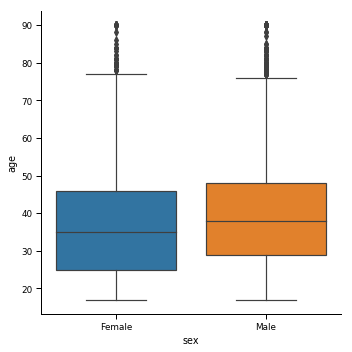

In [227]:
sns.catplot(x="sex", y="age", kind="box", data=df)

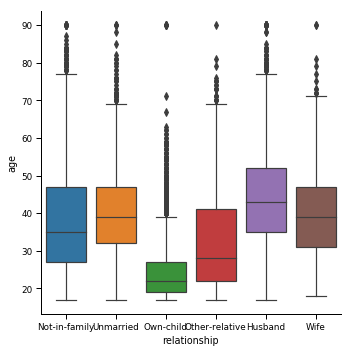

In [226]:
sns.catplot(x="relationship", y="age", kind="box", data=df)